In [2]:
import pandas as pd
df=pd.read_csv("train.csv")
df.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
x=df['GrLivArea']

In [7]:
y=df['SalePrice']

In [8]:
import matplotlib.pyplot as plt

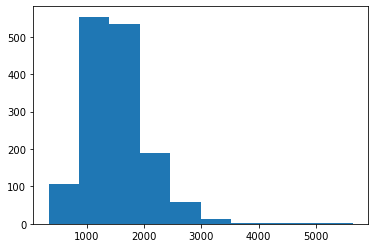

In [9]:
plt.hist(x)
plt.show()

In [10]:
x=(x-x.mean())/x.std()

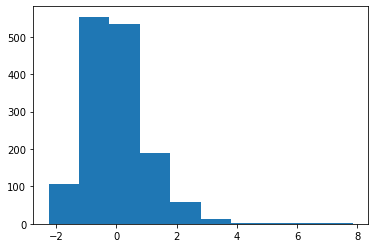

In [11]:
plt.hist(x)
plt.show()

 h<sub>θ</sub>(x) =θ<sub>0</sub>+θ<sub>1</sub>x<sub>1</sub>
J(θ) =1/2∑<sup>m</sup><sub>i=1</sub>(h<sub>θ</sub>(x<sup>(i)</sup>)−y<sup>(i)</sup>)<sup>2</sup>
θ<sub>j</sub>:=θ<sub>j</sub>+α(y<sup>(i)</sup>−h<sub>θ</sub>(x<sup>(i)</sup>))x<sup>(i)</sup><sub>j</sub>


In [13]:
import numpy as np
x = np.c_[np.ones(x.shape[0]),x]

In [14]:
#GRADIENT DESCENT

alpha = 0.01 #Step size
iterations = 2000 #No. of iterations
m = y.size #No. of data points
np.random.seed(123) #Set the seed
theta = np.random.rand(2) #Pick some random values to start with

In [19]:
#GRADIENT DESCENT
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
    
    
        
    return past_thetas, past_costs

In [16]:
x

array([[ 1.        ,  0.37020659],
       [ 1.        , -0.48234664],
       [ 1.        ,  0.51483616],
       ...,
       [ 1.        ,  1.56910958],
       [ 1.        , -0.83250243],
       [ 1.        , -0.49376477]])

In [17]:
theta

array([0.69646919, 0.28613933])

In [21]:
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

In [22]:
theta

array([180921.19589041,  56294.90210563])

In [23]:
#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 180921.20, 56294.90


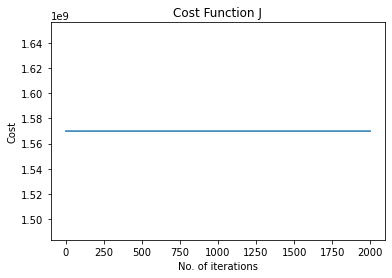

In [26]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [35]:
import matplotlib.animation as animation
#Animation

#Set the plot up,
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = past_thetas[i][1]*x + past_thetas[i][0]
    line.set_data(x, y)
    annotation.set_text('Cost = %.2f e10' % (past_costs[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=0, blit=True)

anim.save('animation.gif', writer='imagemagick', fps = 30)

MovieWriter imagemagick unavailable; using Pillow instead.



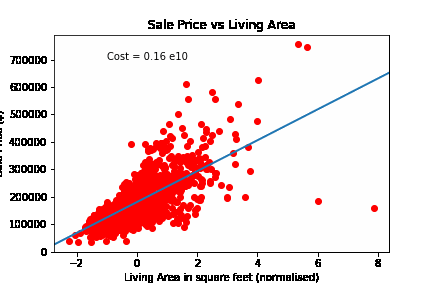

In [36]:
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))